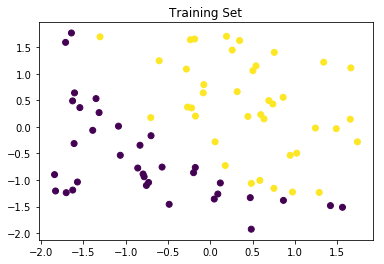

In [1]:
import numpy as np
import LogisticRegression as LR

def normalise(Xin):
        return (Xin-np.mean(Xin,axis=0))/np.std(Xin,axis=0)    # NORMALISING FEATURES

X=np.genfromtxt('LogisticRegressionData1.txt',delimiter=',',usecols=(0,1))
Y=np.genfromtxt('LogisticRegressionData1.txt',delimiter=',',usecols=-1)
sz=X.shape[0]
X=normalise(X)   #normalising X

# separation of training set and test set
test_sz=sz//4  
tr_sz=sz-test_sz   
train=LR.logReg()
train.set(X[:tr_sz-1,:],Y[:tr_sz-1])
test=LR.logReg()
test.set(X[tr_sz:,:],Y[tr_sz:])

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:tr_sz-1,0],X[:tr_sz-1,1],c=Y[:tr_sz-1])
plt.title('Training Set')
plt.show()


In [2]:
# Mini-Batch Gradient-Descent
train.miniGradientDescent(10)

# Parameters
print("The paramaters obtained are: "+str(train.params()))

The paramaters obtained are: [array([1.42409054]), array([4.25501723, 3.6978288 ])]


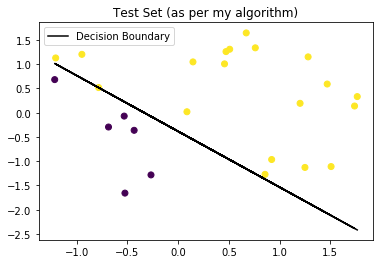

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[tr_sz:,0],X[tr_sz:,1],c=train.predict(X[tr_sz:,:]))
Y_dec=(-X[tr_sz:,0]*train.slope[0]-train.inter)/train.slope[1] # Decision-Boundary
plt.plot(X[tr_sz:,0],Y_dec,c='black',label='Decision Boundary')
plt.title('Test Set (as per my algorithm)')
plt.legend()
plt.show()


In [4]:
# Testing accuracy of prediction on test set
print("The accuracy on the test set is: " + str(train.accuracy(test)) + " %")


The accuracy on the test set is: 88.0 %


In [5]:
# Comparing parameters and accuracy with Sci-kit Learn

from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X[:tr_sz-1,:],Y[:tr_sz-1])

# Parameters
print("The paramaters obtained are: "+str(reg.intercept_)+" and "+str(reg.coef_))

The paramaters obtained are: [0.59363677] and [[2.18454912 1.84592358]]


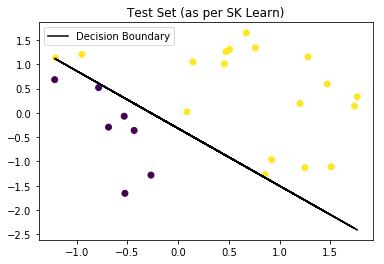

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
prediction=reg.predict(X[tr_sz:])
plt.scatter(X[tr_sz:,0],X[tr_sz:,1],c=prediction)
Y_dec=(-X[tr_sz:,0]*reg.coef_[0,0]-reg.intercept_[0])/reg.coef_[0,1] # Decision-Boundary
plt.plot(X[tr_sz:,0],Y_dec,c='black',label='Decision Boundary')
plt.legend()
plt.title('Test Set (as per SK Learn)')
plt.show()

In [7]:
# Testing accuracy of prediction on test set
acc=(sum(prediction==Y[tr_sz:])/test_sz)*100
print("The accuracy on the test set is: " + str(acc) + " %")

The accuracy on the test set is: 84.0 %
